# Tutto quello che avreste voluto sapere sui fit*
*ma non avete mai osato chiedere

In [1]:
import numpy as np
import ROOT
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep

mpl.style.use(hep.style.ATLAS)

import uncertainties
from uncertainties import ufloat

Welcome to JupyROOT 6.24/02


In [2]:
import iminuit
from iminuit import cost, Minuit

Vogliamo ottenere una comprensione maggiore dei concetti visti a lezione. 

## Minimi quadrati
Il metodo dei minimi quadrati permette, data una funzione, di ottenere il set di parametri che meglio approssima il set di dati $x_i, y_i, \sigma_{y_i}$. Minimizzando la funzione $\chi^2$, espressa come $$\chi^2(\beta) = \sum_{i=1}^{N} \left(\frac{y_i-f(x_i|\beta)}{\sigma_{y_i}}\right)^2.$$ rispetto ai parametri $\beta$, permete di trovare questa approssimazione. La funzione $f(x_i|\beta)$ è una funzione che non viene spesso presentata in forma analitica ma che si conosce in forma numerica. 

Vedremo che il pacchetto `ROOT` permettte già di avere delle classi che calcolano in maniera automatica il valore del $\chi^2$ e ne minimizzano il valore. Elemento chiave di questi pacchietti, come per esempio Minuit, è quello di inizializzare i parametri in modo corretto. Infatti se i parametri sono fissati in maniera errata il rischio è che si possa arrivare ad un minimo relativo della funzione e non un minimo assoluto. 

## TMinuit
TMInuit è l'istanza nel pacchetto ROOT di Minuit, programma scritto in Fortran nel CERN, che permette di minimizzare una funzione dipendente da parametri, ottenendo quindi un valore dei parametri $\mathbf{\hat \beta}$ che la minimizza. 

In [ ]:
def f(x, A, B):
    return A + x*B

def fcn(A, B):
    fcn = 0.0
    for i in range(len(x)):
        fcn += ((y[i]-f(x[i], A, B))/ey[i])**2
    return fcn

x, y, ex, ey = np.loadtxt('pendolo.dat', unpack=True)

In [ ]:
m1 = Minuit(fcn, A=4, B=0)
m1.migrad()

In [ ]:
plt.errorbar(x,y,xerr=ex, yerr=ey, color='k', fmt='.')
plt.plot(x, f(x, *m1.values), color='r')

Ridenifine la funzione $\chi^2$ non è sempre necessario, ma in alcuni casi può risultare obbligatorio, come nel caso di un fit simultaneo. Dati due set di dati che sono correlate su una quantità comune, il fit delle due curve è da realizzare in modo congiunto. 

È per esempio il caso del pendolo di Kater, dove i due set di dati sono da fittare in modo correlato. 

In [9]:
def f(x, a, b, x_0, T_0):
    return a*(x-x_0)**2 + b*(x-x_0) + T_0

x1, y1, σ_x1, σ_y1 = np.loadtxt('perno1.txt', unpack=True)
x2, y2, σ_x2, σ_y2 = np.loadtxt('perno2.txt', unpack=True)

fcn1 = cost.LeastSquares(x1, y1, σ_y1, model=f)
m1 = Minuit(fcn1, a=1, b=1, x_0=1, T_0=1)
m1.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 82.16 (chi2/ndof = 41.1)   │              Nfcn = 269              │
│ EDM = 8.89e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.3901   │  0.0012   │            │            │         │         │       │
│ 1 │ b    │  0.2944   │  0.0011   │            │            │         │         │       │
│ 2 │ x_0  │ 217.6e-3  │  0.9e-3   │            │            │         │         │       │
│ 3 │ T_0  │  1.4625   │  0.0005   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────┐
│     │         a         b       x_0       T_0 │
├─────┼─────────────────────────────────────────┤
│   a │  1.34e-06    -7e-07   2.9e-07  1.33e-07 │
│   b │    -7e-07  1.16e-06  3.01e-07 -2.14e-07 │
│ x_0 │   2.9e-07  3.01e-07  7.27e-07  2.65e-07 │
│ T_0 │  1.33e-07 -2.14e-07  2.65e-07  2.92e-07 │
└─────┴─────────────────────────────────────────┘

In [10]:
fcn2 = cost.LeastSquares(x2, y2, σ_y2, model=f)
m2 = Minuit(fcn2, a=1, b=1, x_0=1, T_0=1)
m2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 30.42 (chi2/ndof = 15.2)   │              Nfcn = 694              │
│ EDM = 1.22e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 858.3e-3  │  0.5e-3   │            │            │         │         │       │
│ 1 │ b    │  -1.1715  │  0.0004   │            │            │         │         │       │
│ 2 │ x_0  │ -19.6e-3  │  0.6e-3   │            │            │         │         │       │
│ 3 │ T_0  │  2.16855  │  0.00031  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────┐
│     │         a         b       x_0       T_0 │
├─────┼─────────────────────────────────────────┤
│   a │  2.99e-07 -8.63e-08  2.47e-07 -7.25e-08 │
│   b │ -8.63e-08  1.87e-07  3.61e-08 -8.63e-08 │
│ x_0 │  2.47e-07  3.61e-08  3.92e-07 -1.03e-07 │
│ T_0 │ -7.25e-08 -8.63e-08 -1.03e-07  9.58e-08 │
└─────┴─────────────────────────────────────────┘

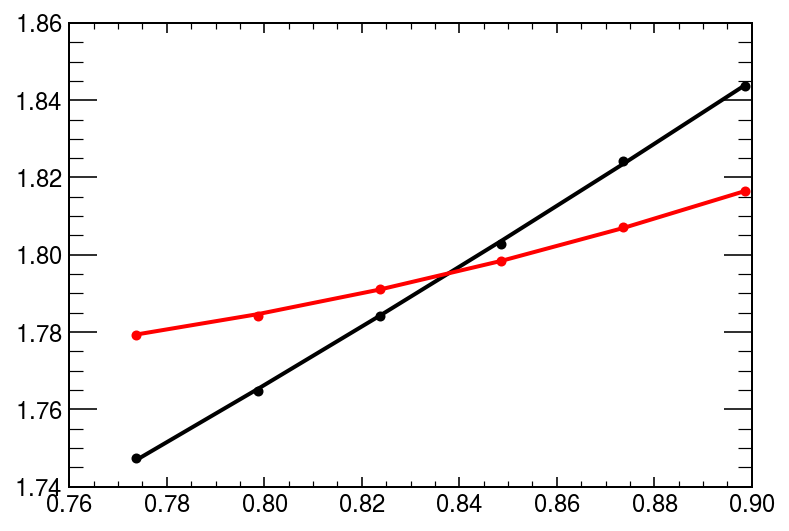

In [11]:
plt.errorbar(x1, y1, xerr=σ_x1, yerr=σ_y1, color='k', fmt='.', label='$T_1$')
plt.errorbar(x2, y2, xerr=σ_x2, yerr=σ_y2, color='r', fmt='.', label='$T_2$')
plt.plot(x1, f(x1, *m1.values), color='k')
plt.plot(x2, f(x2, *m2.values), color='r')

Vogliamo ora provare ad implementare il risultato considerando un fit combinato. 

In [12]:
def χ2(a1, b1, a2, b2, x_0, T_0):
    χ2 = 0.0
    for i in range(len(x1)):
        χ2 += ( (y1[i] - f(x1[i], a1, b1, x_0, T_0))/σ_y1[i] )**2
        χ2 += ( (y2[i] - f(x2[i], a2, b2, x_0, T_0))/σ_y2[i] )**2
    return χ2

In [16]:
combined = Minuit(χ2, a1=0, a2=0, b1=0.1, b2=0.1, x_0=0.8, T_0=1.8)
combined.migrad()

<ipython-input-16-75d91ca5d528>:2: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  combined.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 112.6                      │              Nfcn = 301              │
│ EDM = 1.81e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a1   │   0.39    │   0.04    │            │            │         │         │       │
│ 1 │ b1   │  0.7782   │  0.0012   │            │            │         │         │       │
│ 2 │ a2   │   0.858   │   0.021   │            │            │         │         │       │
│ 3 │ b2   │ 300.0e-3  │  0.8e-3   │            │            │         │         │       │
│ 4 │ x_0  │ 837.67e-3 │  0.23e-3  │            │            │         │         │       │
│ 5 │ T_0  │  1.79503  │  0.00012  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────┐
│     │        a1        b1        a2        b2       x_0       T_0 │
├─────┼─────────────────────────────────────────────────────────────┤
│  a1 │   0.00133  -1.2e-05 -2.73e-08  9.29e-06  5.41e-06  1.62e-06 │
│  b1 │  -1.2e-05  1.45e-06 -1.86e-06  1.59e-11  6.07e-09  8.58e-09 │
│  a2 │ -2.73e-08 -1.86e-06  0.000439  3.36e-06 -2.38e-06 -1.85e-06 │
│  b2 │  9.29e-06  1.59e-11  3.36e-06  6.06e-07  7.55e-08  3.11e-08 │
│ x_0 │  5.41e-06  6.07e-09 -2.38e-06  7.55e-08  5.18e-08  2.42e-08 │
│ T_0 │  1.62e-06  8.58e-09 -1.85e-06  3.11e-08  2.42e-08   1.4e-08 │
└─────┴─────────────────────────────────────────────────────────────┘

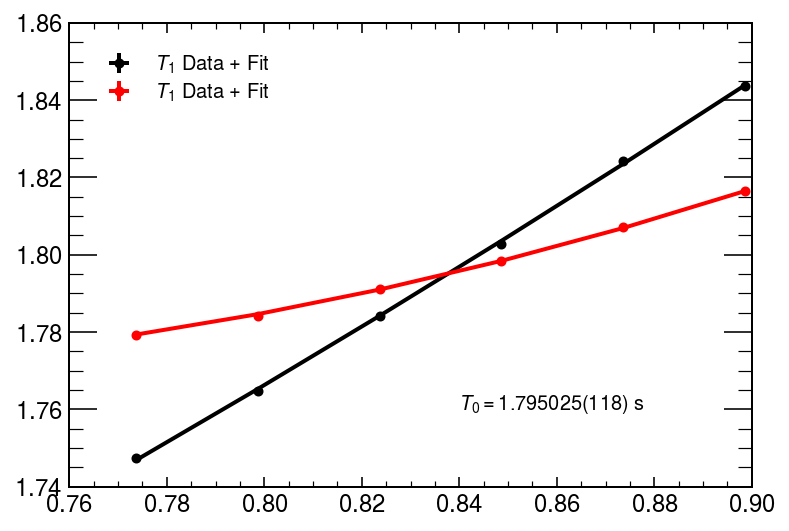

In [20]:
plt.errorbar(x1, y1, xerr=σ_x1, yerr=σ_y1, color='k', fmt='.', label='$T_1$ Data + Fit')
plt.errorbar(x2, y2, xerr=σ_x2, yerr=σ_y2, color='r', fmt='.', label='$T_1$ Data + Fit')
plt.plot(x1, f(x1, combined.values['a1'], combined.values['b1'], combined.values['x_0'], combined.values['T_0']), color='k')
plt.plot(x2, f(x2, combined.values['a2'], combined.values['b2'], combined.values['x_0'], combined.values['T_0']), color='r')
plt.text(0.84, 1.76, f'$T_0 = {ufloat(combined.values["T_0"], combined.errors["T_0"]):.3uLS}$ s')
plt.legend()